(372, 650)


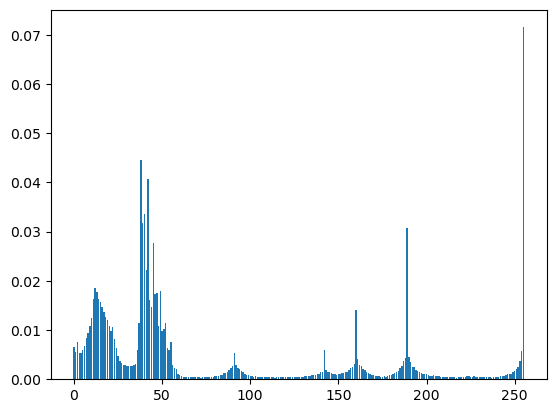

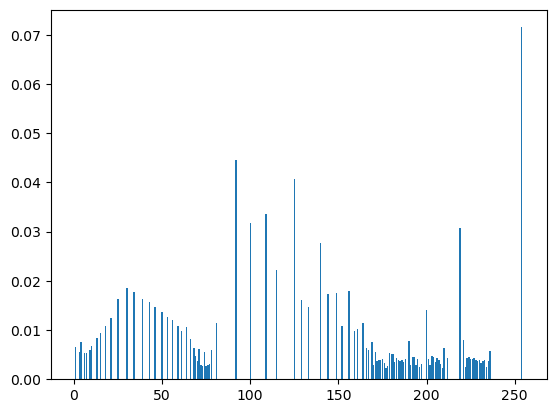

In [21]:
# 灰階圖片影像增強


# 主要概念 : 

# 1. 將影像的強度分配 0 ~ 255 平均化，如此來將原本集中顏色而對比偏低的強度打散，增加對比度

# 2. 如果偏暗的分配就往 255 打散調亮，如果偏亮的分配就往 0 打散調暗，如果在中間就往兩側打散

# 3. 基本上就是畫圖就可以理解，x 軸是原本強度，y 軸是新的強度，x 軸集中的地方就在 y 軸拉開對應，這樣就可以平均化


import cv2
import os
import numpy
import matplotlib.pyplot as plt


# 1. 一樣讀取影片，但第二個參數設定為 0 ，變成灰階

my_image_gray = cv2.imread("image/Haku.jpg",0)

# 可以發現矩陣變成 2D 而已，因為是灰階，沒有 BGR

print(numpy.shape(my_image_gray))


# 2. 將矩陣依照 Equalization 的演算法轉換強度值

# a. 先做出原強度的機率陣列和機率分配圖

hist_list = numpy.zeros(256)

row = numpy.shape(my_image_gray)[0]

column = numpy.shape(my_image_gray)[1]

# 利用迴圈讀取每個元素，如果是某個強度，就在那個強度位置 + 1

for r in range(row) : 

    for c in range(column) : 

        value = my_image_gray[r,c]

        hist_list[value] = hist_list[value] + 1

# 最後除以總像素數量變成機率

hist_list = hist_list / ( row * column )

plt.bar(range(256),hist_list)

plt.show()

# b. 做出新強度陣列，將每個強度的累計機率乘上 ( 總強度數量 - 1 ) 並取四捨五入 ( 或無條件捨去或無條件進位 )

transform_list = numpy.zeros(256)

total = 0

# 用迴圈累加機率，並計算各強度的新強度值

for i in range(256) : 

    total = total + hist_list[i]

    # round ( , 0) 就是 int()

    transform_list[i] = int(255 * total)

# c. 用轉換陣列做出新的圖，並畫出新的分配直方圖

# 做出新的圖

# 要注意這邊因為 transform list 有特別設定是 int , 因此要接住他的值的東西也要是 int 的設定

# 基本上 array 沒有預設數字是 int 或 float , 除非他接住特別型別數字或自己設定才會變成那一個設定

# 這邊 numpy.zero 也可以用 numpy.zero( , , numpy.int or numpy.float) 來設定

my_image_gray_2 = numpy.int16(numpy.zeros((row,column)))

for r in range(row) : 

    for c in range(column) : 

        value = my_image_gray[r,c]

        my_image_gray_2[r,c] = transform_list[value]

# 算出新的機率分配直方圖，跟前面一樣方法再做一次

hist_list_2 = numpy.zeros(256)

for r in range(row) : 

    for c in range(column) : 

        value = my_image_gray_2[r,c]

        hist_list_2[value] = hist_list_2[value] + 1

hist_list_2 = hist_list_2 / ( row * column )

plt.bar(range(256),hist_list_2)

plt.show()

